# Titanic: A Complete Journey from Data to Prediction

A comprehensive analysis and machine learning project to predict passenger survival on the RMS Titanic.

## 1. Project Objective

The goal of this project is to analyze the Titanic passenger dataset and build a predictive model to determine whether a passenger survived the disaster. This is a classic binary classification problem. We will perform the following steps:

**Data Exploration & Cleaning:** Understand the data and handle missing values.

**Feature Engineering:** Create new, meaningful features to improve model performance.

**Modeling & Hyperparameter Tuning:** Build and optimize a machine learning model.

**Evaluation:** Assess the model's performance using various metrics.

## 2. Data Loading and Initial Exploration

First, we load the necessary libraries and the train.csv and test.csv datasets provided by Kaggle.

In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import plotly.io as pio
pio.renderers.default = "kaggle"

warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("pastel")

In [93]:
train_data_path = '/kaggle/input/titanic/train.csv'
test_data_path = '/kaggle/input/titanic/test.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

df = train_df.copy()

### 2.1. Initial Analysis

A preliminary look at the training data reveals several key points:

**Shape:** The training data contains 891 rows and 12 columns.

**Missing Values:** There are significant missing values in three columns:

**Age:** 177 missing entries.

**Cabin:** 687 missing entries (over 77% of the data).

**Embarked:** 2 missing entries.

**Data Types:** The dataset contains a mix of numerical (int64, float64) and categorical (object) data.

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.shape

(891, 12)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


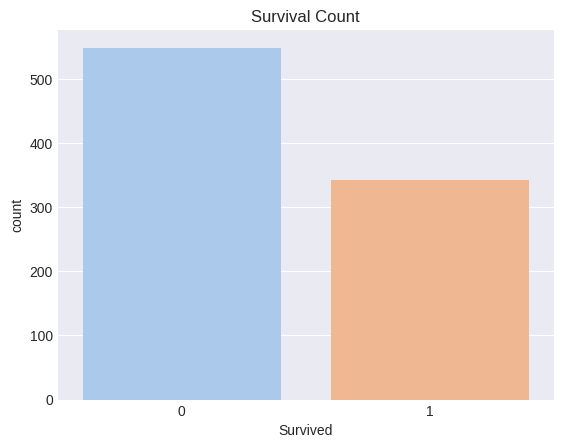

In [98]:
fig = px.pie(df, names='Survived', title='Survival Distribution')
fig.show()

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

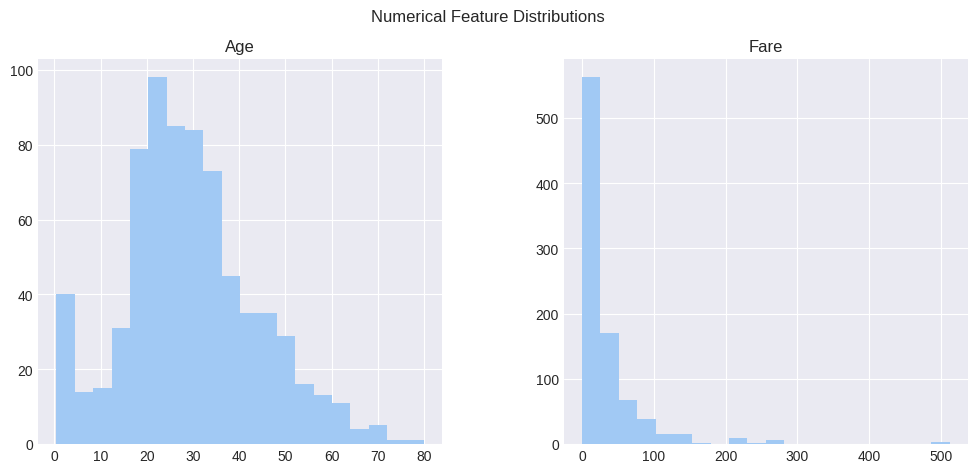

In [99]:
df[['Age', 'Fare']].hist(figsize=(12,5), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

In [100]:
fig = px.histogram(df, x='Pclass', color='Survived', barmode='group', title='Survival by Pclass')
fig.show()

fig = px.histogram(df, x='Sex', color='Survived', barmode='group', title='Survival by Sex')
fig.show()

fig = px.histogram(df, x='Embarked', color='Survived', barmode='group', title='Survival by Embarked')
fig.show()


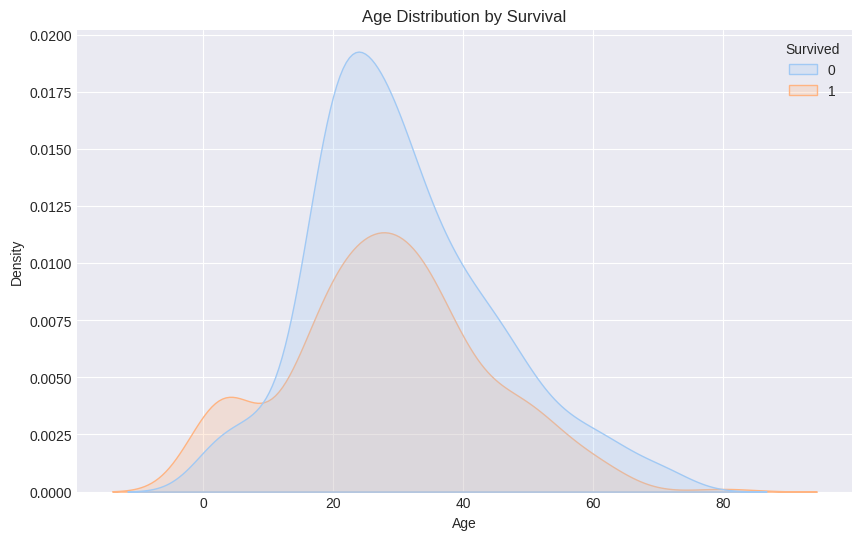

In [101]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='Age', hue='Survived', data=df, fill=True)
plt.title("Age Distribution by Survival")
plt.show()

### 2.2. Data Cleaning Strategy

Based on the initial analysis, we will apply the following cleaning strategy:

**Age:** Since Age is a critical feature, we will fill the missing values. Using the median is a robust choice as it is less sensitive to outliers than the mean.

**Embarked:** With only two missing values, we can safely fill them with the most frequent port of embarkation (the mode).

**Cabin:** Because this column is missing over 77% of its data, trying to impute it would likely add more noise than signal. Therefore, the most sensible approach is to drop this column entirely.

**Fare (Test Set):** The test set has one missing Fare value. We will fill this later using the median Fare from the training set to prevent data leakage.

In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

## 3. Feature Engineering: Creating New Insights

This is the most critical step for improving model performance. We will transform existing features and create new ones to provide the model with stronger signals.

**FamilySize and IsAlone**

The SibSp and Parch columns indicate the number of siblings/spouses and parents/children, respectively. We can combine them to create a more powerful FamilySize feature. From this, we can also derive a simple binary feature, IsAlone, which may capture a different dynamic.

**Title**

The Name column is unique for each passenger, but it contains valuable information in the form of titles (Mr., Mrs., Miss, etc.). These titles are excellent proxies for age, gender, and social status. We will extract these titles and consolidate rare ones into a single 'Rare' category to prevent overfitting.

**Binning Age and Fare**

Continuous numerical features like Age and Fare can sometimes be more powerful when grouped into bins.

**AgeBins:** We group Age into logical categories like 'Child', 'Teen', 'YoungAdult', etc. This helps the model capture non-linear relationships (e.g., the survival chances of a child are very different from a young adult).

**FareBins:** The Fare distribution is highly skewed. Using pd.qcut divides the data into equal-sized groups (quartiles), which handles the skewness well and helps the model interpret fare as a proxy for socio-economic class.

In [104]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = np.where(df['FamilySize']==1, 1, 0)

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts()<10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

df['FareBins'] = pd.qcut(df['Fare'], 4, labels=['Low', 'MedLow', 'MedHigh', 'High'])
df['AgeBins'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','YoungAdult','Adult','Senior'])

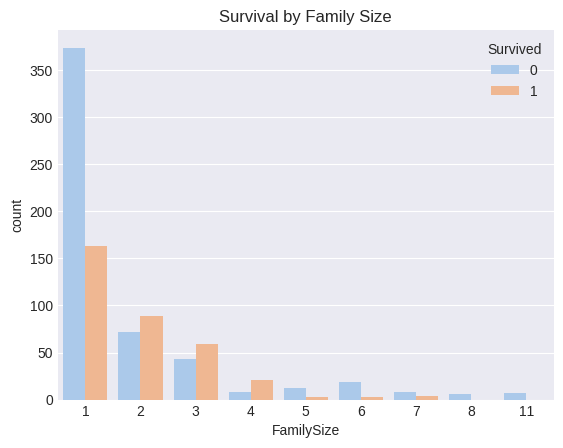

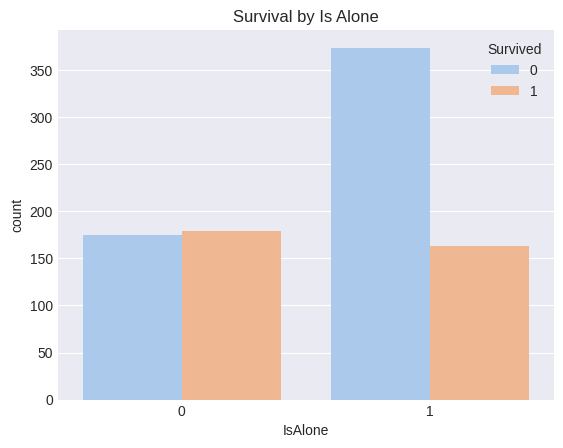

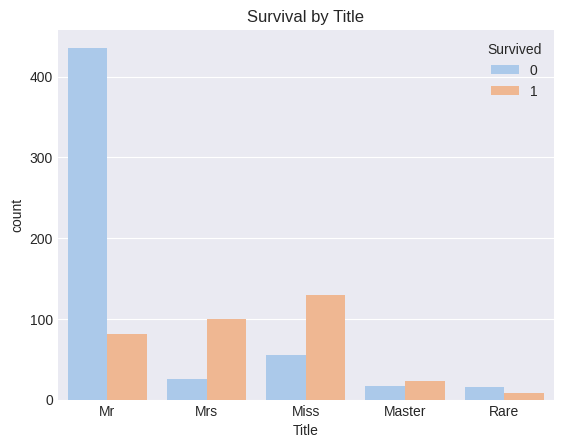

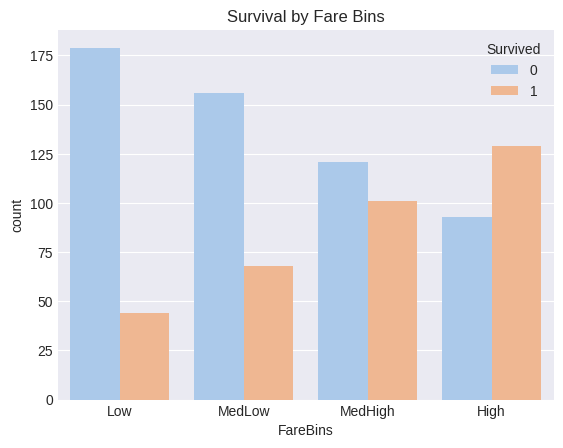

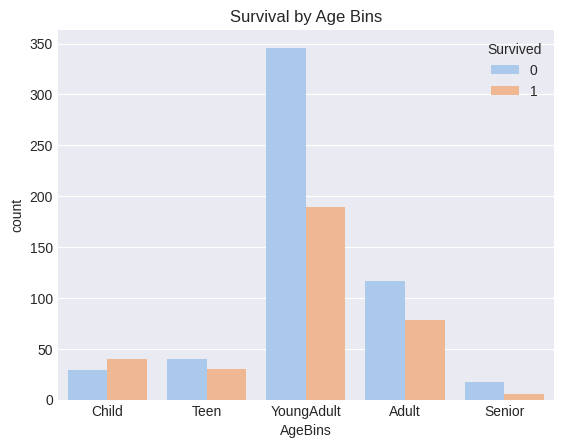

In [105]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()

sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title("Survival by Is Alone")
plt.show()

sns.countplot(x='Title', hue='Survived', data=df)
plt.title("Survival by Title")
plt.show()

sns.countplot(x='FareBins', hue='Survived', data=df)
plt.title("Survival by Fare Bins")
plt.show()

sns.countplot(x='AgeBins', hue='Survived', data=df)
plt.title("Survival by Age Bins")
plt.show()

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title,FareBins,AgeBins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,Low,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,High,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,MedLow,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,High,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,MedLow,YoungAdult


In [107]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import optuna

In [108]:
df.drop(columns=['SibSp', 'Parch', 'Age', 'Fare', 'Name', 'Ticket', 'PassengerId'], inplace=True)

df = pd.get_dummies(df, columns=['Title', 'FareBins', 'AgeBins', 'Sex', 'Embarked'], drop_first=True)

print(df.head())


   Survived  Pclass  FamilySize  IsAlone  Title_Miss  Title_Mr  Title_Mrs  \
0         0       3           2        0       False      True      False   
1         1       1           2        0       False     False       True   
2         1       3           1        1        True     False      False   
3         1       1           2        0       False     False       True   
4         0       3           1        1       False      True      False   

   Title_Rare  FareBins_MedLow  FareBins_MedHigh  FareBins_High  AgeBins_Teen  \
0       False            False             False          False         False   
1       False            False             False           True         False   
2       False             True             False          False         False   
3       False            False             False           True         False   
4       False             True             False          False         False   

   AgeBins_YoungAdult  AgeBins_Adult  AgeBins_Seni

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Modeling and Optimization
Our strategy is to use a powerful and robust model, the RandomForestClassifier, and tune its hyperparameters for optimal performance.

**Hyperparameter Tuning with Optuna**

Instead of a brute-force GridSearchCV, we use Bayesian Optimization with the Optuna library. Optuna intelligently searches the hyperparameter space, learning from past trials to focus on more promising areas. This is often more efficient and can find better parameter combinations than a grid search.

We define an objective function that Optuna will aim to maximize. Inside this function, a RandomForestClassifier is trained and evaluated using 5-fold cross-validation to ensure the performance score is stable and reliable.

In [109]:
def objective(trial):
    """
    This function takes a 'trial' object and suggests hyperparameters,
    trains a model, and returns its cross-validated accuracy.
    """
    # Suggest hyperparameters for the RandomForestClassifier
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 4, 16),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }

    # Create the model with the suggested hyperparameters
    model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)

    # Calculate the mean cross-validation score to get a robust performance estimate
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5).mean()

    return score

# 2. Create a study object and run the optimization.
print("\n--- Starting Bayesian Optimization with Optuna... ---")
# We want to maximize the accuracy, so direction is 'maximize'.
study = optuna.create_study(direction='maximize')
# Run 100 trials. Optuna will intelligently search for the best combination.
study.optimize(objective, n_trials=100)


# 3. Print the results.
print("\n--- Optuna Optimization Finished ---")
print(f"Number of finished trials: {len(study.trials)}")
print("Best trial:")
best_trial = study.best_trial

print(f"  Value (CV Accuracy): {best_trial.value:.4f}")
print("  Best Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

[I 2025-07-09 10:39:12,173] A new study created in memory with name: no-name-3db0e9b1-c69e-4761-a1b4-efbcdd7ab353



--- Starting Bayesian Optimization with Optuna... ---


[I 2025-07-09 10:39:15,234] Trial 0 finished with value: 0.8202009258347287 and parameters: {'n_estimators': 178, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 0 with value: 0.8202009258347287.
[I 2025-07-09 10:39:17,167] Trial 1 finished with value: 0.8243868807249088 and parameters: {'n_estimators': 324, 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 8, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 1 with value: 0.8243868807249088.
[I 2025-07-09 10:39:19,077] Trial 2 finished with value: 0.8257854821235103 and parameters: {'n_estimators': 311, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 17, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 2 with value: 0.8257854821235103.
[I 2025-07-09 10:39:20,842] Trial 3 finished with value: 0.828592534226337 and parameters: {'n_estimators': 304, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 12, 'm


--- Optuna Optimization Finished ---
Number of finished trials: 100
Best trial:
  Value (CV Accuracy): 0.8314
  Best Params: 
    n_estimators: 86
    max_depth: 10
    min_samples_leaf: 1
    min_samples_split: 18
    max_features: log2
    criterion: entropy


## 5. Model Evaluation
After finding the best hyperparameters with Optuna, we train the final model on the entire training set and evaluate its performance on the unseen test set. Our final Kaggle submission score was 0.78708.

In [110]:
final_model = RandomForestClassifier(**best_trial.params, random_state=42, n_jobs=-1)

# Train the final model on the entire training set
final_model.fit(X_train, y_train)

# Make predictions on the unseen test set
y_pred = final_model.predict(X_test)

# Evaluate the final model's performance
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy of the Final Tuned Model: {test_accuracy:.4f}")

print("\nFinal Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


Test Set Accuracy of the Final Tuned Model: 0.8212

Final Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### 5.1. Confusion Matrix
The confusion matrix gives us a detailed breakdown of our model's predictions, showing where it was correct and where it made errors (False Positives and False Negatives).

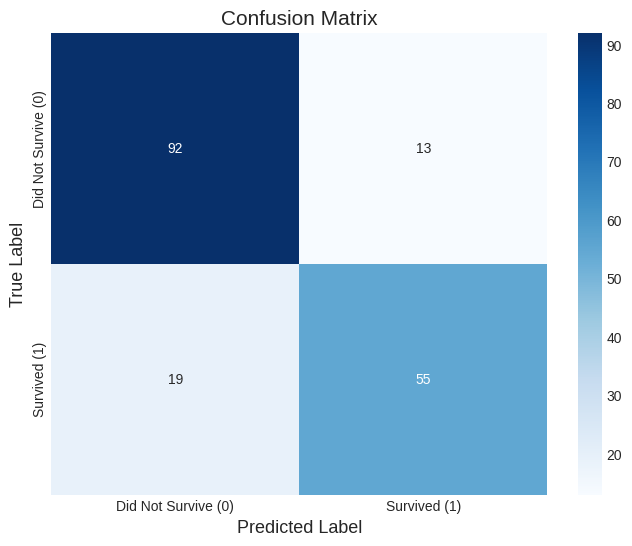

In [111]:
# 1. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Create a heatmap with Seaborn
plt.figure(figsize=(8, 6)) # Set the figure size

sns.heatmap(cm, 
            annot=True,      # Annotate the cells with the numeric value
            fmt='d',         # Format the numbers as integers
            cmap='Blues',    # Choose a color map
            xticklabels=['Did Not Survive (0)', 'Survived (1)'], 
            yticklabels=['Did Not Survive (0)', 'Survived (1)'])

# Add labels and a title
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('True Label', fontsize=13)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

### 5.2. Feature Importance
This chart shows which features the final model considered most important when making its predictions. It confirms the value of our feature engineering, as Title, Sex, and FamilySize are expected to be highly influential.

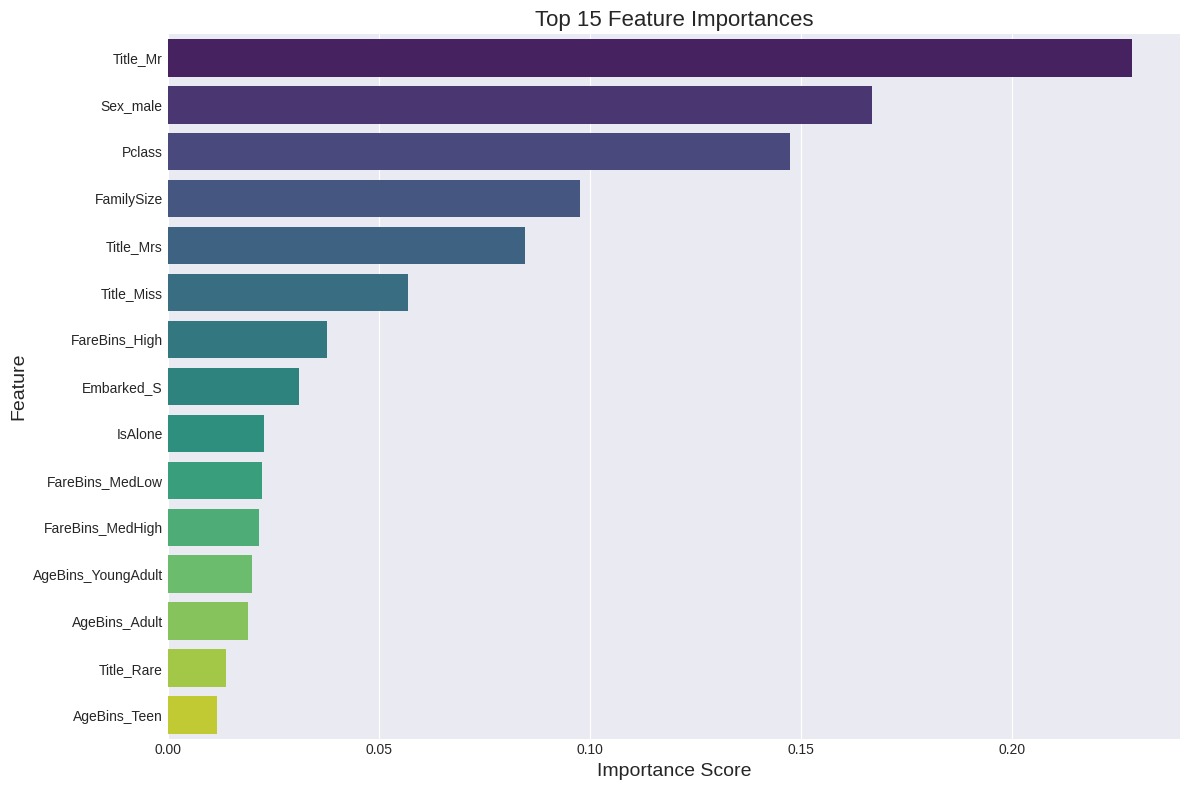

In [112]:
# 1. Get feature importances and store them in a DataFrame
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False) # Sort by importance

# 2. Create a bar chart with Seaborn
plt.figure(figsize=(12, 8)) # Set the figure size

# Display only the top 15 features to keep the chart readable
sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')

# Add a title and labels
plt.title('Top 15 Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()

### 5.3. ROC Curve and AUC Score
The ROC Curve illustrates the model's ability to distinguish between the two classes. The Area Under the Curve (AUC) provides a single score for this ability. An AUC of 1.0 is a perfect model, while 0.5 is a random guess.

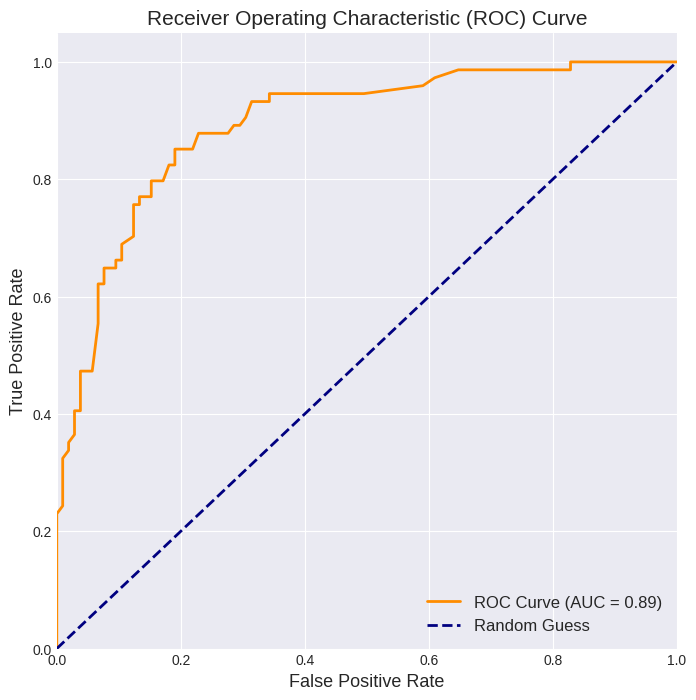

In [113]:
from sklearn.metrics import roc_curve, auc

# 1. Get the prediction probabilities for the positive class (Survived=1)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# 2. Calculate the values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Calculate the AUC score
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess') # The reference line

# Set labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

## 6. Final Step: Generating the Submission File
The final step is to apply the exact same preprocessing pipeline to the test.csv data, make predictions with our final tuned model, and format the results into a submission.csv file as required by the competition.

In [120]:
import pandas as pd
import numpy as np

train_data_path = '/kaggle/input/titanic/train.csv'
test_data_path = '/kaggle/input/titanic/test.csv'

# --- STEP 1: Get Reference Values from the Training Data ---
print("--- Getting reference values from the training data... ---")
try:
    train_df_for_ref = pd.read_csv(train_data_path)
except FileNotFoundError:
    print(f"ERROR: File not found at {train_data_path}. Please check the file path in the 'Input' menu on the right in Kaggle.")
    exit()

# We use statistics from the training set to fill missing values in the test set.
age_median_train = train_df_for_ref['Age'].median()
embarked_mode_train = train_df_for_ref['Embarked'].mode()[0]
fare_median_train = train_df_for_ref['Fare'].median()

# Create the 'Title' column for the reference DataFrame to get 'known_titles'
print("--- Creating 'Title' column for the reference DataFrame... ---")
train_df_for_ref['Title'] = train_df_for_ref['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df_for_ref['Title'] = train_df_for_ref['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
train_df_for_ref['Title'] = train_df_for_ref['Title'].replace(rare_titles, 'Rare')
known_titles = train_df_for_ref['Title'].unique()


# --- STEP 2: Load and Process the Test Data ---
print("--- Loading and processing the test data... ---")
try:
    test_df = pd.read_csv(test_data_path)
except FileNotFoundError:
    print(f"ERROR: File not found at {test_data_path}. Please check the file path in the 'Input' menu on the right in Kaggle.")
    exit()

# Set aside the PassengerIds for the final submission file.
test_passenger_ids = test_df['PassengerId']

# == Apply the exact same preprocessing steps as on the training data ==

# Fill missing values
test_df['Age'].fillna(age_median_train, inplace=True)
test_df['Embarked'].fillna(embarked_mode_train, inplace=True)
test_df['Fare'].fillna(fare_median_train, inplace=True) # The test set has a missing Fare value
test_df.drop(columns=['Cabin'], inplace=True)

# Feature Engineering
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = np.where(test_df['FamilySize']==1, 1, 0)

test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
test_df['Title'] = test_df['Title'].replace(rare_titles, 'Rare')
# If a title exists in the test set but not the training set, map it to 'Rare' for consistency.
test_df['Title'] = test_df['Title'].apply(lambda x: x if x in known_titles else 'Rare')

test_df['FareBins'] = pd.qcut(test_df['Fare'], 4, labels=['Low', 'MedLow', 'MedHigh', 'High'])
test_df['AgeBins'] = pd.cut(test_df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','YoungAdult','Adult','Senior'])

# Drop unnecessary columns
test_df.drop(columns=['SibSp', 'Parch', 'Age', 'Fare', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# One-Hot Encoding
test_df = pd.get_dummies(test_df, columns=['Title', 'FareBins', 'AgeBins', 'Sex', 'Embarked'], drop_first=True)


# --- STEP 3: Align Columns (CRUCIAL STEP) ---
# To prevent errors, the test set columns must exactly match the training set columns.
print("--- Aligning columns with the training data... ---")

train_columns = X.columns
test_processed = test_df.reindex(columns=train_columns, fill_value=0)

# For verification
print(f"Number of columns in training data: {len(train_columns)}")
print(f"Number of columns in processed test data: {len(test_processed.columns)}")


# --- STEP 4: Make Predictions ---
print("--- Making predictions... ---")

# Use the best-trained model (final_model) to make predictions
test_predictions = final_model.predict(test_processed)


# --- STEP 5: Create and Save the Submission File ---
print("--- Creating the submission file ('submission.csv')... ---")

# Create a DataFrame in the format required by Kaggle
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})

# Save the DataFrame to a CSV file.
# The index=False parameter is crucial to prevent writing the DataFrame index as a column.
submission_df.to_csv('submission.csv', index=False)

print("\n'submission.csv' file created successfully!")
print("\nFirst 5 rows of the submission file:")
print(submission_df.head())

--- Getting reference values from the training data... ---
--- Creating 'Title' column for the reference DataFrame... ---
--- Loading and processing the test data... ---
--- Aligning columns with the training data... ---
Number of columns in training data: 17
Number of columns in processed test data: 17
--- Making predictions... ---
--- Creating the submission file ('submission.csv')... ---

'submission.csv' file created successfully!

First 5 rows of the submission file:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
